In [307]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [479]:
#reading train and test datasets
ds = pd.read_csv('train.csv')
ds2 = pd.read_csv('test.csv')

In [47]:
ds.shape

(28322, 36)

In [51]:
ds.isnull().sum()# to see null values per column

id        0
gender    0
s11       0
s12       0
s13       0
s16       0
s17       0
s18       0
s48       0
s52       0
s58       0
s69       0
s70       0
s71       0
n1        0
n2        0
n3        0
n4        0
n5        0
n6        0
n7        0
n8        0
n9        0
n10       0
n11       0
n12       0
n13       0
n14       0
n15       0
label     0
dtype: int64

In [480]:
#to drop unnecessary and less correlated column
ds = ds.drop(['s12','s53','s54','s55','s56','s57','s58','s59','id','n4','n1','n7','n9','n10','n11','n12','n13','n14','n15'], axis = 1)

ds2_ids = ds2['id']
ds2 = ds2.drop(['s12','s53','s54','s55','s56','s57','s58','s59','id','n4','n1','n7','n9','n10','n11','n12','n13','n14','n15'], axis = 1)

#ds.fillna(0)

In [301]:
ds.shape
ds2.shape

(85065, 15)

In [481]:
#Encoding and replacing categorical data

#for_train.csv

ds['s52'] = ds['s52'].replace(['l','o','1','0'],[3,2,1,0])
ds['gender'] = ds['gender'].replace(['M','F'],[1,0])
ds['s11'] = ds['s11'].replace(['Y','N'],[1,0])
#s['s12'] =ds['s12'].replace(['Y','N'],[1,0])
ds['s16'] = ds['s16'].replace(['A','B','C','D'],[0,1,2,3])
ds['s17'] =ds['s17'].replace(['A','B','C','D'],[0,1,2,3])
ds['s18'] = ds['s18'].replace(['A','B','C','D'],[0,1,2,3])
#s['s58'] = ds['s58'].replace(['A','B'],[0,1])
ds['s69'] = ds['s69'].replace(['x','~1','C`','0'],[0,1,2,3])
ds['s70'] = ds['s70'].replace(['op: D', 'op: C', 'op: B', 'op: A'],[3,2,1,0])
ds['s71'] = ds['s71'].replace(['b', 'd', 'c', 'a'],[1,3,2,0])

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
#s['s53'] = encode.fit_transform(ds['s53'])
#s['s54'] = encode.fit_transform(ds['s54'])
#s['s55'] = encode.fit_transform(ds['s55'])

#for_test.csv

ds2['s52'] = ds2['s52'].replace(['l','o','1','0'],[3,2,1,0])
ds2['gender'] = ds2['gender'].replace(['M','F'],[1,0])
ds2['s11'] = ds2['s11'].replace(['Y','N'],[1,0])
#s2['s12'] =ds2['s12'].replace(['Y','N'],[1,0])
ds2['s16'] = ds2['s16'].replace(['A','B','C','D'],[0,1,2,3])
ds2['s17'] =ds2['s17'].replace(['A','B','C','D'],[0,1,2,3])
ds2['s18'] = ds2['s18'].replace(['A','B','C','D'],[0,1,2,3])
#s2['s58'] = ds2['s58'].replace(['A','B'],[0,1])
ds2['s69'] = ds2['s69'].replace(['x','~1','C`','0'],[0,1,2,3])
ds2['s70'] = ds2['s70'].replace(['op: D', 'op: C', 'op: B', 'op: A'],[3,2,1,0])
ds2['s71'] = ds2['s71'].replace(['b', 'd', 'c', 'a'],[1,3,2,0])

#s2['s54'] = encode.fit_transform(ds2['s54'])
#s2['s55'] = encode.fit_transform(ds2['s55'])
#s2['s53'] = encode.fit_transform(ds2['s53'])

In [197]:
ds.head(10)
ds2.head(10)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1,1,1,1,1,3,3,0,1,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1,1,1,1,1,2,1,1,1,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1,1,0,1,1,3,1,1,1,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,1,1,1,1,3,3,1,0,1,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,1,1,1,1,3,2,1,1,1,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0
5,b'gAAAAABinOjXAODyYIVqRlaoPYbx-Jv8eRgDswdtPGjv...,1,1,1,1,3,3,1,0,1,...,0.006217,-8.691409,1.524488,8.477102,11.503684,1.824085,0,0,0.787256,6
6,b'gAAAAABinOisnbt53eXCkLke8jizXWRz7--dNFUc7_Kv...,1,0,1,1,1,3,2,1,1,...,0.010729,-9.233940,1.490601,7.347506,5.708466,1.593072,0,0,0.878133,1
7,b'gAAAAABinOiyF59tNYeyeqJgOghB-WdrHMvt0VlyS6Ea...,1,1,1,1,3,3,1,1,1,...,0.005381,-8.779382,1.718437,5.376519,10.905976,1.895801,0,0,0.769569,6
8,b'gAAAAABinOjR9YDjuAxxfRNtfd_3BVP0tadTnZSmQhOw...,1,0,1,1,1,3,1,1,1,...,0.009376,-8.809759,1.962656,6.780483,11.438956,1.847398,0,0,0.905184,2
9,b'gAAAAABinOjFpdyJwRKQxC-tnq4zhpFb7zg2T0jh2tOY...,1,1,0,1,1,1,3,1,1,...,0.018922,-9.143473,1.532382,2.911209,3.701080,1.843613,0,0,0.792054,2


In [106]:
ds.loc[0,'s71']

1

In [384]:
ds['s53'].unique()

array(['  ', ' '], dtype=object)

In [267]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  28322 non-null  int64  
 1   s12     28322 non-null  int64  
 2   s18     28322 non-null  int64  
 3   s48     28322 non-null  int64  
 4   s52     28322 non-null  int64  
 5   s58     28322 non-null  int64  
 6   s69     28322 non-null  int64  
 7   s71     28322 non-null  int64  
 8   n1      28322 non-null  float64
 9   n2      28322 non-null  float64
 10  n3      28322 non-null  int64  
 11  n4      28322 non-null  float64
 12  n5      28322 non-null  float64
 13  n6      28322 non-null  float64
 14  n7      28322 non-null  float64
 15  n8      28322 non-null  float64
 16  n9      28322 non-null  float64
 17  n10     28322 non-null  float64
 18  n11     28322 non-null  float64
 19  n12     28322 non-null  int64  
 20  n13     28322 non-null  int64  
 21  n14     28322 non-null  float64
 22

In [482]:
# splitting train dataset for finding the accuracy of each model
from sklearn.model_selection import train_test_split

X = ds.drop(['label'],axis = 1)
y = ds['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)



array([[<AxesSubplot:xlabel='gender', ylabel='gender'>,
        <AxesSubplot:xlabel='s12', ylabel='gender'>,
        <AxesSubplot:xlabel='s18', ylabel='gender'>,
        <AxesSubplot:xlabel='s48', ylabel='gender'>,
        <AxesSubplot:xlabel='s52', ylabel='gender'>,
        <AxesSubplot:xlabel='s58', ylabel='gender'>,
        <AxesSubplot:xlabel='s69', ylabel='gender'>,
        <AxesSubplot:xlabel='s71', ylabel='gender'>,
        <AxesSubplot:xlabel='n1', ylabel='gender'>,
        <AxesSubplot:xlabel='n2', ylabel='gender'>,
        <AxesSubplot:xlabel='n3', ylabel='gender'>,
        <AxesSubplot:xlabel='n4', ylabel='gender'>,
        <AxesSubplot:xlabel='n5', ylabel='gender'>,
        <AxesSubplot:xlabel='n6', ylabel='gender'>,
        <AxesSubplot:xlabel='n7', ylabel='gender'>,
        <AxesSubplot:xlabel='n8', ylabel='gender'>,
        <AxesSubplot:xlabel='n9', ylabel='gender'>,
        <AxesSubplot:xlabel='n10', ylabel='gender'>,
        <AxesSubplot:xlabel='n11', ylabel='gender'>,

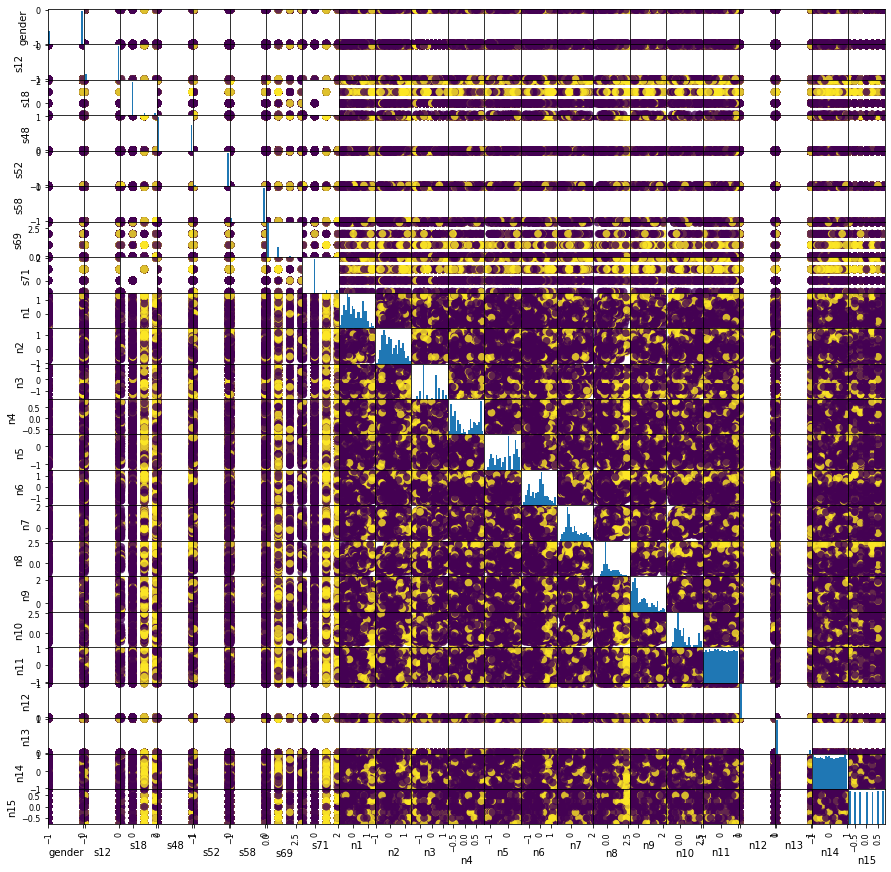

In [274]:
# scatter plot to see if label classes are linearly separable or not
df = pd.DataFrame(X_train, columns = X.columns)
pd.plotting.scatter_matrix(df, figsize=(15, 15),
                           marker='o', c = y_train, hist_kwds={'bins': 20}, s=60,
                           alpha=.8)   
# Found non-linear

In [462]:
#for scaling numerical values using RobustScaler

#for_train
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test

#for_test

ds2_scaled = scaler.transform(ds2)

In [474]:
#for scaling numerical values using MinMaxScaler

#for train

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#for_test

ds2_scaled = scaler.transform(ds2)

In [483]:
#for scaling numerical values using StandardScaler

#for train

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#for_test

ds2_scaled = scaler.transform(ds2)

(array([21205.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4284.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

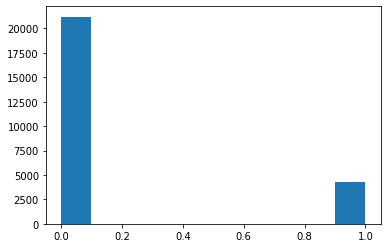

In [276]:
# Histogram to see the ratio of label classes
fig,ax = plt.subplots()
ax.hist(y_train)

<AxesSubplot:>

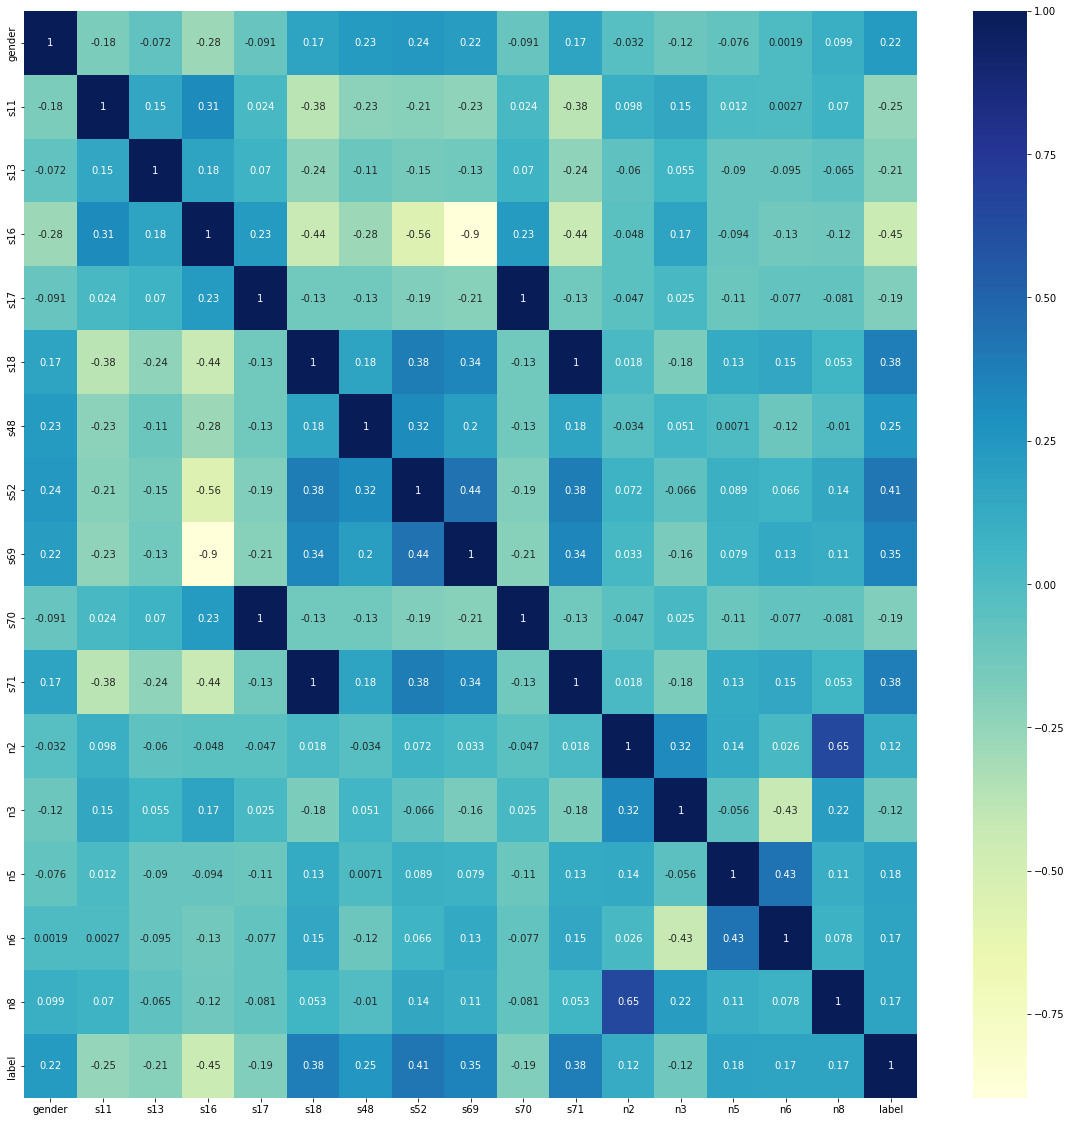

In [463]:
# Heatmap to see the correlation of every features with label

f2 = pd.DataFrame(ds, columns = ds.columns)
df2_corr= df2.corr()
df2_corr
plt.figure(figsize=(20,20))
sns.heatmap(df2_corr,annot=True,cmap = 'YlGnBu')

#from the heatmap, it is found that some features have less correlation with label, hence these are dropped

# Here, I used some non-linear classifiers

In [487]:

#kNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # fitting the train dataset

print("Test set score: {:.5f}".format(knn.score(X_test, y_test)))

# predicting the label for test dataset

knn_test = knn.predict(ds2_scaled)
print(knn_test)

Test set score: 0.85366
[1 0 1 ... 0 0 0]


In [486]:
#LogisticRegression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)   # fitting the train dataset

print("Test set score: {:.5f}".format(lr.score(X_test, y_test)))

# predicting the label for test dataset

lr_test = lr.predict(ds2_scaled)
print(lr_test)

Test set score: 0.87538
[1 1 1 ... 0 1 0]


In [485]:
#RandomForest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)    # fitting the train dataset

print("Test set score: {:.5f}".format(rf.score(X_test, y_test)))

# predicting the label for test dataset

rf_test = rf.predict(ds2_scaled)
print(rf_test)

Test set score: 0.87432
[1 0 1 ... 0 1 0]


In [484]:
#GradientBoosting model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)   # fitting the train dataset

print("Test set score: {:.5f}".format(gb.score(X_test, y_test)))

# predicting the label for test dataset

gb_test = gb.predict(ds2_scaled)
print(gb_test)

Test set score: 0.87696
[1 1 1 ... 0 1 0]


In [488]:
#DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)     # fitting the train dataset

print("Test set score: {:.5f}".format(dt.score(X_test, y_test)))

# predicting the label for test dataset

dt_test = dt.predict(ds2_scaled)
print(dt_test)

Test set score: 0.80530
[1 0 1 ... 0 0 1]


In [489]:
#Finally considered the GradientBoosting model since it has higher accuracy

testdf = pd.DataFrame({'id':ds2_ids, 'label':gb_test})
testdf

,id,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0
...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,0
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,1
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,0
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,1


In [490]:
testdf.to_csv('Submission_TSAIBros_1f18ni.csv', index=False)